### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns



# load the dataset

In [2]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")


In [3]:
sample = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

# Exploratory Data Analysis

In [4]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
train.shape

(20000, 22)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

> statistics and relationships in the data


In [7]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [8]:
train.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

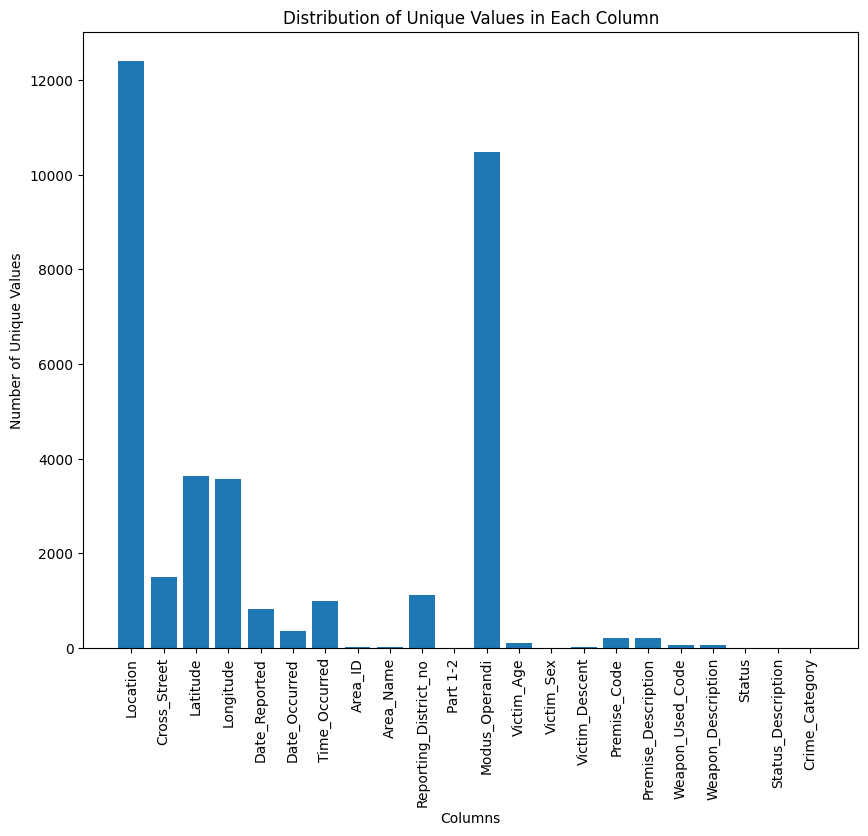

In [9]:
desc_uniq = train.nunique()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(train.columns, desc_uniq)
plt.title('Distribution of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

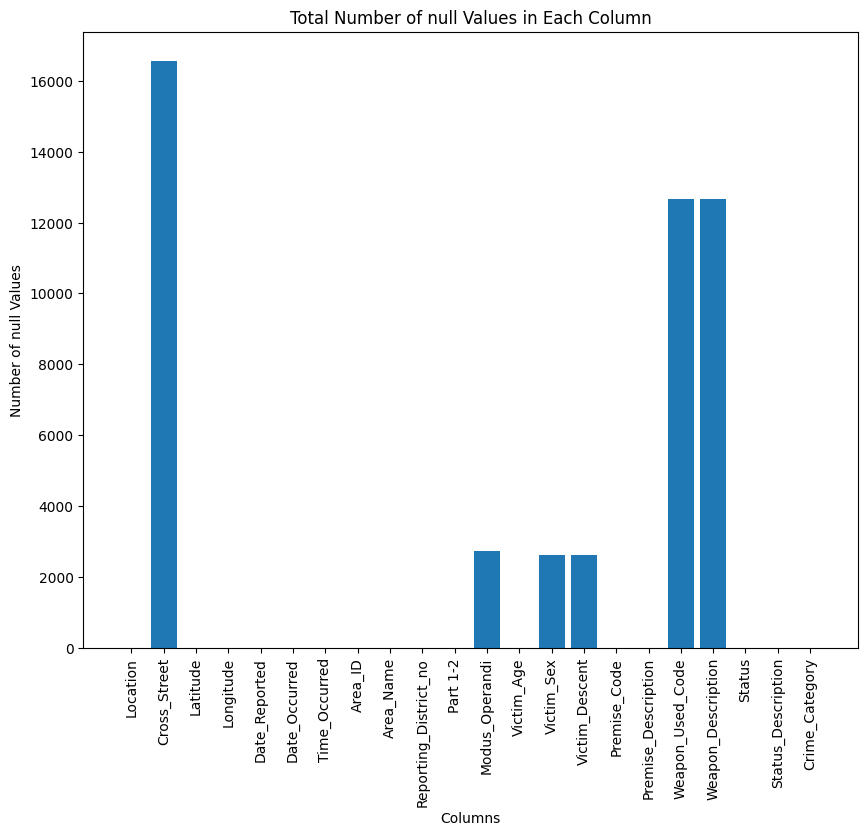

In [10]:
desc_null = train.isnull().sum()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(train.columns, desc_null)
plt.title('Total Number of null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of null Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

> Test set

In [11]:
test

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

In [13]:
test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


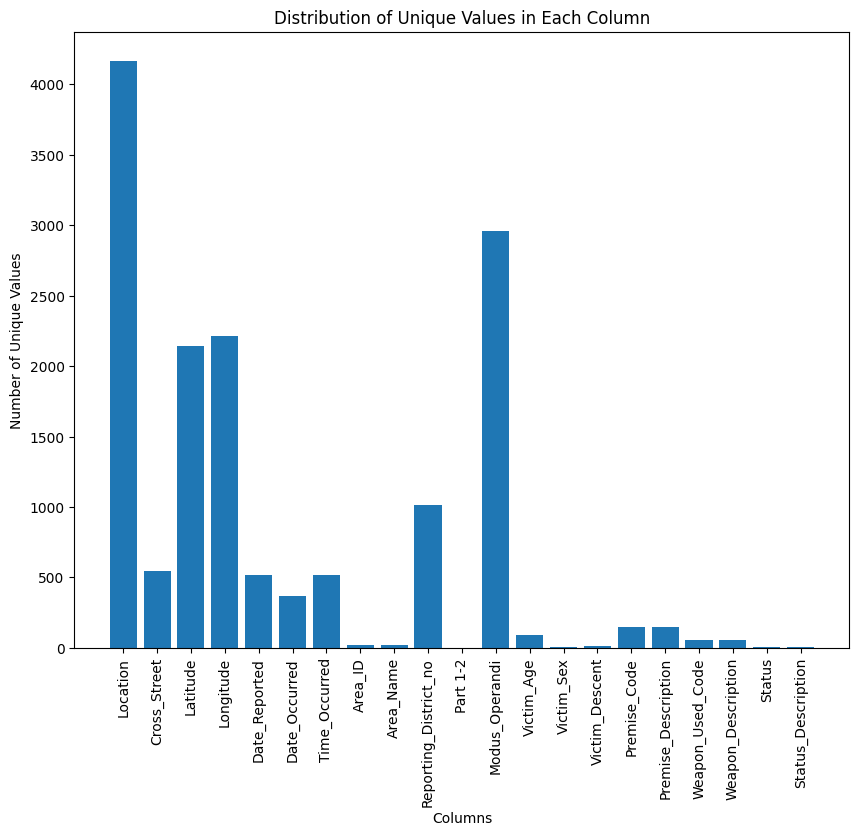

In [14]:
desc_uniq_test = test.nunique()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(test.columns, desc_uniq_test)
plt.title('Distribution of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

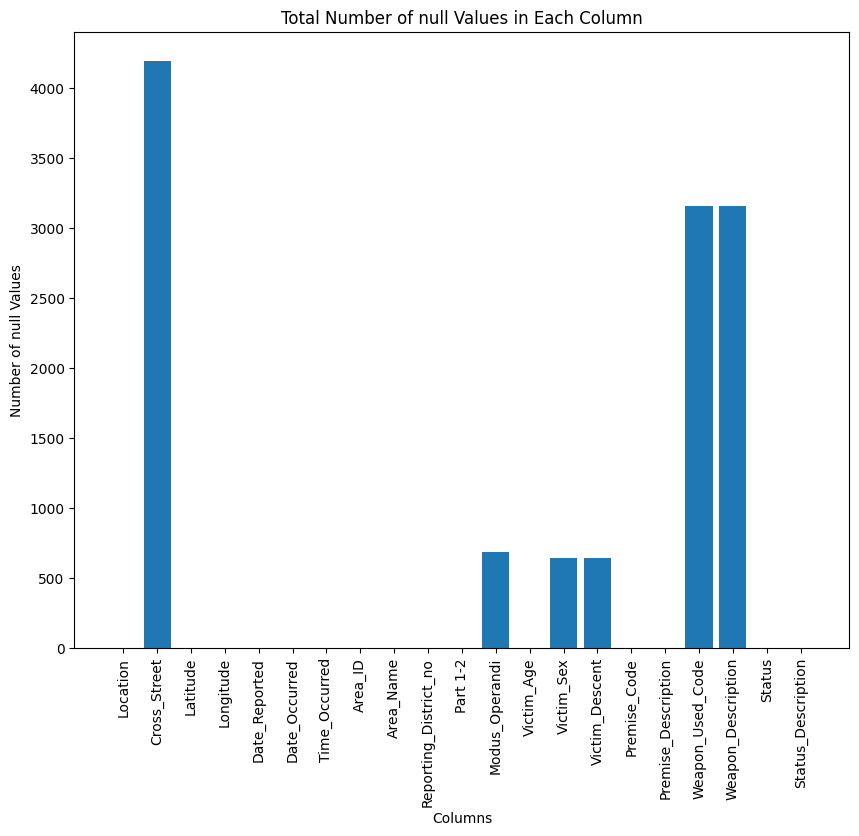

In [15]:
desc_null_test = test.isnull().sum()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(test.columns, desc_null_test)
plt.title('Total Number of null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of null Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

   * In this data there have 9 numerical columns and 12 categorical columns 
   * In train set Location column contains most unique values
   * In the train data set 'Cross_Street' column contains a lot of null values 
   * In this data, the victim age column contains some negative values which is not possible  

# Preprocessing and feature extraction

In [16]:
train.drop(columns=['Cross_Street'],axis = 1,inplace = True)
test.drop(columns=['Cross_Street'],axis = 1,inplace = True)

In [17]:
# Identify and handle mixed-type columns
def convert_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [19]:
numeric_features = ['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Time_Occurred', 'Premise_Code', 'Weapon_Used_Code']
#numeric_features = ['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']

In [20]:
# Convert numeric features to numeric type
train = convert_to_numeric(train, numeric_features)
test = convert_to_numeric(test, numeric_features)

> Handle missing values by replacing 'null' strings and NaNs

In [21]:

train['Victim_Age'] = train['Victim_Age'].replace(to_replace="null", value=np.nan)
test['Victim_Age'] = test['Victim_Age'].replace(to_replace="null", value=np.nan)

In [22]:
#cat_cols = ['Victim_Sex', 'Cross_Street', 'Modus_Operandi', 'Victim_Descent', 'Weapon_Description', 'Premise_Description']
cat_cols = ['Victim_Sex', 'Modus_Operandi', 'Victim_Descent', 'Weapon_Description', 'Premise_Description']

> Filling Missing Data - Imputation

In [24]:
cat_impute = SimpleImputer(strategy='most_frequent')
num_impute = SimpleImputer(strategy='mean')

train[cat_cols] = cat_impute.fit_transform(train[cat_cols])
train[numeric_features] = num_impute.fit_transform(train[numeric_features])

mask = (train['Victim_Age'] > 0.0)
train['Victim_Age'] = train['Victim_Age'].where(mask, train.loc[mask, 'Victim_Age'].median())

In [25]:
print(train.isnull().sum())

Location                 0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64


<Axes: >

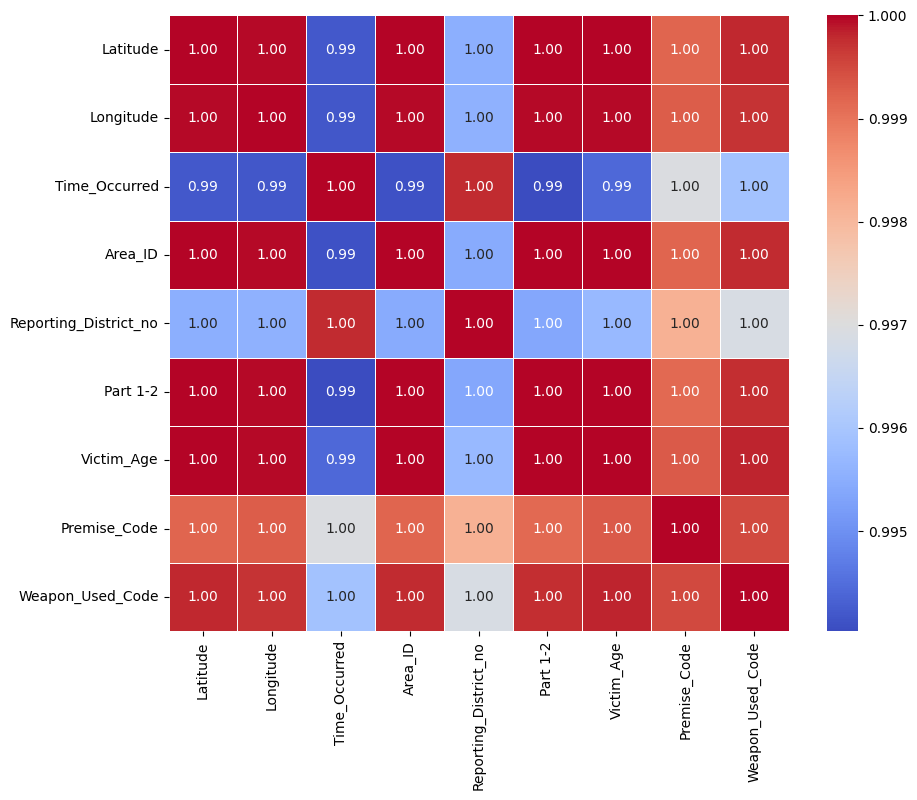

In [26]:
desc_corr = train.describe().corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(desc_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Test set

In [27]:
test[cat_cols] = cat_impute.transform(test[cat_cols])
test[numeric_features] = num_impute.transform(test[numeric_features])

mask = (test['Victim_Age'] > 0.0)
test['Victim_Age'] = test['Victim_Age'].where(mask, test.loc[mask, 'Victim_Age'].median())

In [28]:
test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,39.406400,300.858800,365.521821
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,13.731721,212.253742,72.620702
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,30.000000,101.000000,366.405044
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,37.000000,203.000000,366.405044
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


> # define x_train and y_train

In [29]:
# Separate the target column from the training data
target_col = 'Crime_Category'  # Replace with the actual name of the target column
x = train.drop(columns=[target_col])
y = train[target_col]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

> #  Scaling and Encoding

In [31]:
categorical_features = ['Location', 'Modus_Operandi', 'Area_Name', 'Victim_Sex', 'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status', 'Status_Description', 'Date_Reported', 'Date_Occurred']

In [32]:
# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

In [34]:
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [35]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



# Models

> ## Dummy 

In [36]:
from sklearn.dummy import DummyClassifier
x = train.drop(columns=["Crime_Category"])
y = train["Crime_Category"]
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train,y_train)
y_pred = dummy_clf.predict(x_test)
y_pred

array(['Property Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype='<U15')

# DecisionTreeClassifier

In [37]:
clf=DecisionTreeClassifier()

In [38]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [39]:
clf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Area_ID',
                                                   'Reporting_District_no',
                                                   'Part 1-2', 'Victim_Age',
                                                   'Time_Occurred',
                                                   'Premise_Code',
                                                   'Weapon_Used_Code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Modus_Operandi',
                                                   'Area_Name', 'Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Description',
                                                   'Weapon_Description',
                                                   'Status',
                                                   'Status_Description',
                                                   'Date_Reported',
                                                   'Date_Occurred'])])),
                ('classifier', DecisionTreeClassifier())])

In [41]:
y_pred=clf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8545

In [ ]:
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores decision tree: {cross_val_scores}')
print(f'Mean cross-validation accuracy decision tree: {cross_val_scores.mean()}')

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confu = confusion_matrix(y_test,y_pred)

In [45]:
confu

array([[  32,    6,    0,    1,    6,   12],
       [   7,  329,   64,   12,   58,   73],
       [   0,   52,  305,    5,   60,    0],
       [   1,   13,   13,    8,   18,    2],
       [   5,   57,   42,    7, 3196,  154],
       [  24,   46,    2,    0,  133, 1257]])

# RandomForestClassifier

In [46]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [47]:
rf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Area_ID',
                                                   'Reporting_District_no',
                                                   'Part 1-2', 'Victim_Age',
                                                   'Time_Occurred',
                                                   'Premise_Code',
                                                   'Weapon_Used_Code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Modus_Operandi',
                                                   'Area_Name', 'Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Description',
                                                   'Weapon_Description',
                                                   'Status',
                                                   'Status_Description',
                                                   'Date_Reported',
                                                   'Date_Occurred'])])),
                ('classifier', RandomForestClassifier())])

In [48]:
y_pred_random=rf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_random)

0.848

In [ ]:
cross_val_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores random: {cross_val_scores}')
print(f'Mean cross-validation accuracy random: {cross_val_scores.mean()}')

In [50]:
confusion_matrix(y_test,y_pred_random)

array([[   2,    3,    1,    0,    4,   47],
       [   0,  235,   28,    0,  151,  129],
       [   0,    6,  254,    0,  155,    7],
       [   0,    8,    4,    1,   39,    3],
       [   0,    9,    8,    0, 3270,  174],
       [   0,   11,    2,    0,  123, 1326]])

# Gradiant Bosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier())])

In [53]:
gb.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Area_ID',
                                                   'Reporting_District_no',
                                                   'Part 1-2', 'Victim_Age',
                                                   'Time_Occurred',
                                                   'Premise_Code',
                                                   'Weapon_Used_Code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Modus_Operandi',
                                                   'Area_Name', 'Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Description',
                                                   'Weapon_Description',
                                                   'Status',
                                                   'Status_Description',
                                                   'Date_Reported',
                                                   'Date_Occurred'])])),
                ('classifier', GradientBoostingClassifier())])

In [54]:
y_pred_gradiant=gb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_gradiant)

In [ ]:
cross_val_scores = cross_val_score(gb, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores gradiant: {cross_val_scores}')
print(f'Mean cross-validation accuracy random gradiant: {cross_val_scores.mean()}')

In [ ]:
confusion_matrix(y_test,y_pred_gradiant)

#  Hyperparameter tuning

> # Gradiant Bosting

In [ ]:
param_grid = {
    'classifier__learning_rate': [0.1, 0.5],
    'classifier__n_estimators': [100],
    'classifier__min_samples_leaf': [1, 3]
}

In [ ]:
grid_search = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print(f'Best cross-validation accuracy: {grid_search.best_score_}')

In [ ]:
y_pred_grid = grid_search.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_grid)

In [ ]:
y_pred = grid_search.predict(test)

In [ ]:
submission = pd.DataFrame(columns=['ID', 'Crime_Category'])
submission['ID']=[i for i in range(1,len(y_pred)+1)]
submission["Crime_Category"] = y_pred
submission.to_csv('submission.csv',index=False)

#  Summary

* 1.Importing libraries. 
* Load the data
* Performed  Exploratory Data Analysis(EDA)
* Define feature types and relationships between features 
* Data preprocessing :
          1. Clean the train and test set
          2. Replace undefined values with appropriate value
          3. Filling missing values:  In numerical features filling missing  values with mean strategies and Categorical values with mode strategies
          
* Define x_train and y_train 
* define Scaling and Encoding :  In numerical features filling missing values with mean strategies and Categorical values with mode strategies
* Build Modeles:
          1. DecisionTreeClassifier : accuracy_score --> 0.851
          2. RandomForestClassifier : accuracy_score --> 0.853
          3.  Gradiant Bosting : accuracy_score --> 0.88
 
 * Gradiant Bosting showed highest performance among the models, so hyperparameter tuning was done on them.
